In [1]:
%load_ext autoreload
%autoreload 2
from util import make_n_runs_and_avg_stats
from GNNFakeNews.utils.helpers.hyperparameter_factory import HparamFactory
from GNNFakeNews.utils.helpers.gnn_model_explainer import  GNNModelExplainer
from GNNFakeNews.utils.enums import GNNModelTypeEnum, GNNFeatureTypeEnum
from util import visualize_sample

# 1.2. SAGE GNN

## DATASET = POLITIFACT, FEATURE = BERT

In [2]:
model_type = GNNModelTypeEnum.SAGE_GNN

In [4]:
model, dataset_manager, acc, prec, rec, f1 = make_n_runs_and_avg_stats(model_type, n=10)
print(f'Acc: {acc}, Prec: {prec}, Rec: {rec}, F1: {f1}')

#################################
-----> The hyperparameters are set!
model_type = GNNModelTypeEnum.SAGE_GNN
dataset = GNNDatasetTypeEnum.POLITIFACT
batch_size = 128
lr = 0.01
weight_decay = 0.01
n_hidden = 128
epochs = 35
feature = GNNFeatureTypeEnum.BERT
concat = True
transform = <GNNFakeNews.utils.data_loader.ToUndirected object at 0x7fb8463bf610>
#################################
Loading dataset 'politifact' from directory: /home/sersery/Desktop/TUM Informatik/SS22/Thesis/Code/Explainability_of_FND_Models/GNNFakeNews/data/local
#################################
-----> The hyperparameters are set!
model_type = GNNModelTypeEnum.SAGE_GNN
dataset = GNNDatasetTypeEnum.POLITIFACT
batch_size = 128
lr = 0.01
weight_decay = 0.01
n_hidden = 128
epochs = 35
feature = GNNFeatureTypeEnum.BERT
concat = True
transform = <GNNFakeNews.utils.data_loader.ToUndirected object at 0x7fb846312f10>
#################################
Loading dataset 'politifact' from directory: /home/sersery/Desktop/TUM Info

all_last_layer_val size: (314, 128)
all_y size: (314,)


/home/sersery/Applications/anaconda3/envs/gnnfakenews/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


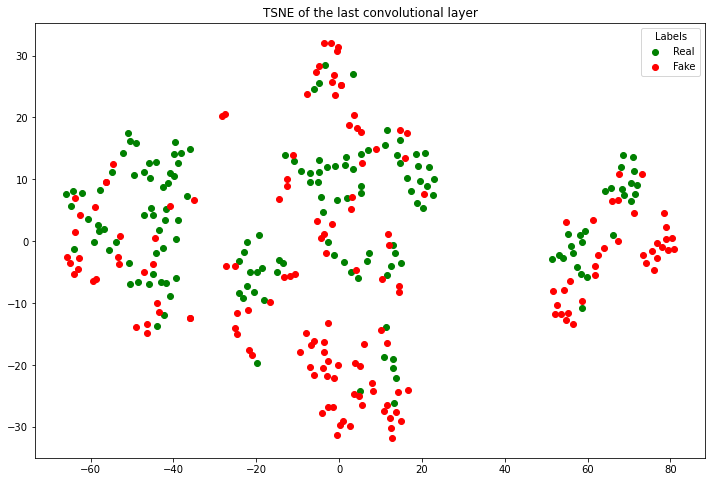

In [4]:
model.m_visualize_tsne_of_last_conv_layer(split='all')

In [5]:
sample_data = dataset_manager.get_random_train_samples(device=model.m_args.device)[0]
explainer = GNNModelExplainer(model, sample_data)

Choosing indexes in dataset: [155]
Choosing indexes in train: [3]


Explain graph: 100%|██████████| 200/200 [00:00<00:00, 375.11it/s]


tensor([0])
y: Fake
Using the threshold method: median
Removing edges with score less than 0.13371218740940094 with min torch.return_types.min(
values=tensor(0.1120),
indices=tensor(376)) and max torch.return_types.max(
values=tensor(0.1555),
indices=tensor(766))
 ############ Graph before dropping edges according to the edge mask ############


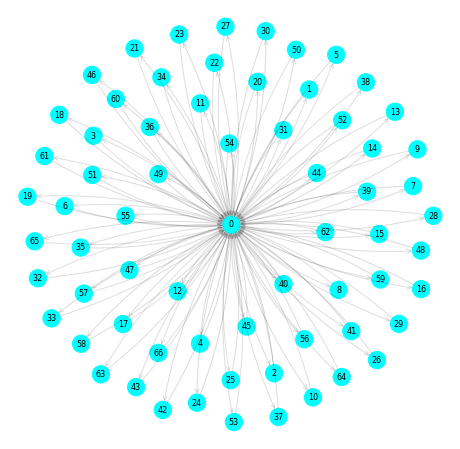

#################################################################################
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#################################################################################
 ############ Graph after dropping edges according to the edge mask ############
Dropping 406 edges out of 811
241
Number of nodes before dropping unimportant edges: 67


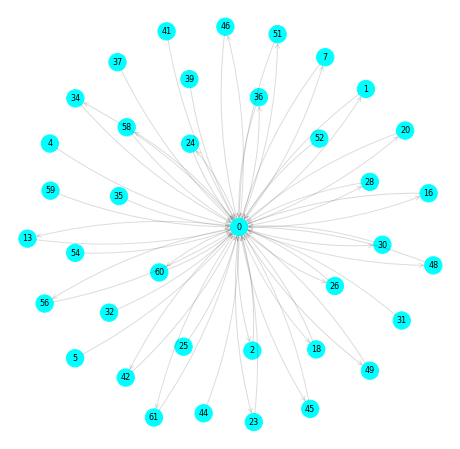

In [6]:
explainer.visualize_explaining_graph()

In [7]:
import torch
# index 0 : Example1
# index25: Example2
echo_chamber1_loader = dataset_manager.loader(torch.utils.data.Subset(dataset_manager.train_loader.dataset, [0]), batch_size=dataset_manager.batch_size)
for d in echo_chamber1_loader:
    echo_chamber1 = d.to(model.m_args.device)

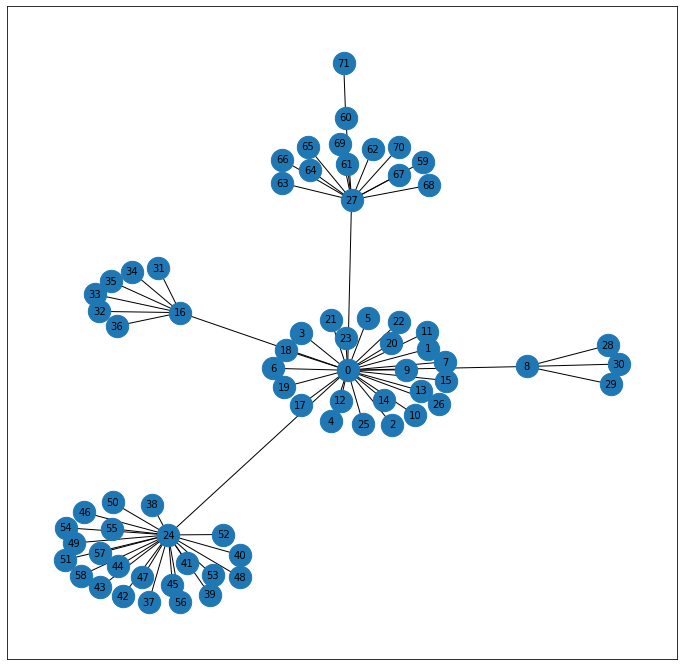

In [30]:
visualize_sample(echo_chamber1, save_fig='EchoChamberExample1')

In [9]:
echo_chamber1.y

tensor([0], device='cuda:0')

In [10]:
echo_chamber1

DataBatch(edge_index=[2, 214], x=[72, 768], y=[1], batch=[72], ptr=[2])

In [11]:
explainer_echo_chamber = GNNModelExplainer(model, echo_chamber1)

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 412.95it/s]


tensor([0])
y: Fake
Using the threshold method: median
Removing edges with score less than 0.11108995974063873 with min torch.return_types.min(
values=tensor(0.0855),
indices=tensor(122)) and max torch.return_types.max(
values=tensor(0.1514),
indices=tensor(14))
 ############ Graph before dropping edges according to the edge mask ############


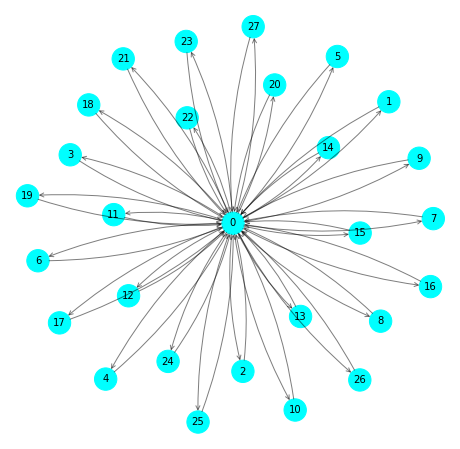

#################################################################################
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#################################################################################
 ############ Graph after dropping edges according to the edge mask ############
Dropping 107 edges out of 214
63
Number of nodes before dropping unimportant edges: 28


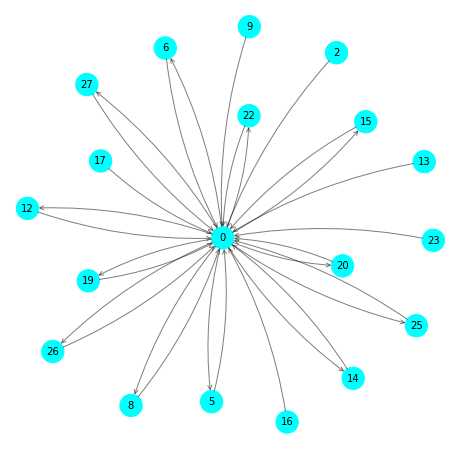

In [32]:
explainer_echo_chamber.visualize_explaining_graph(save_as='EchoChamberExample1Explanation')

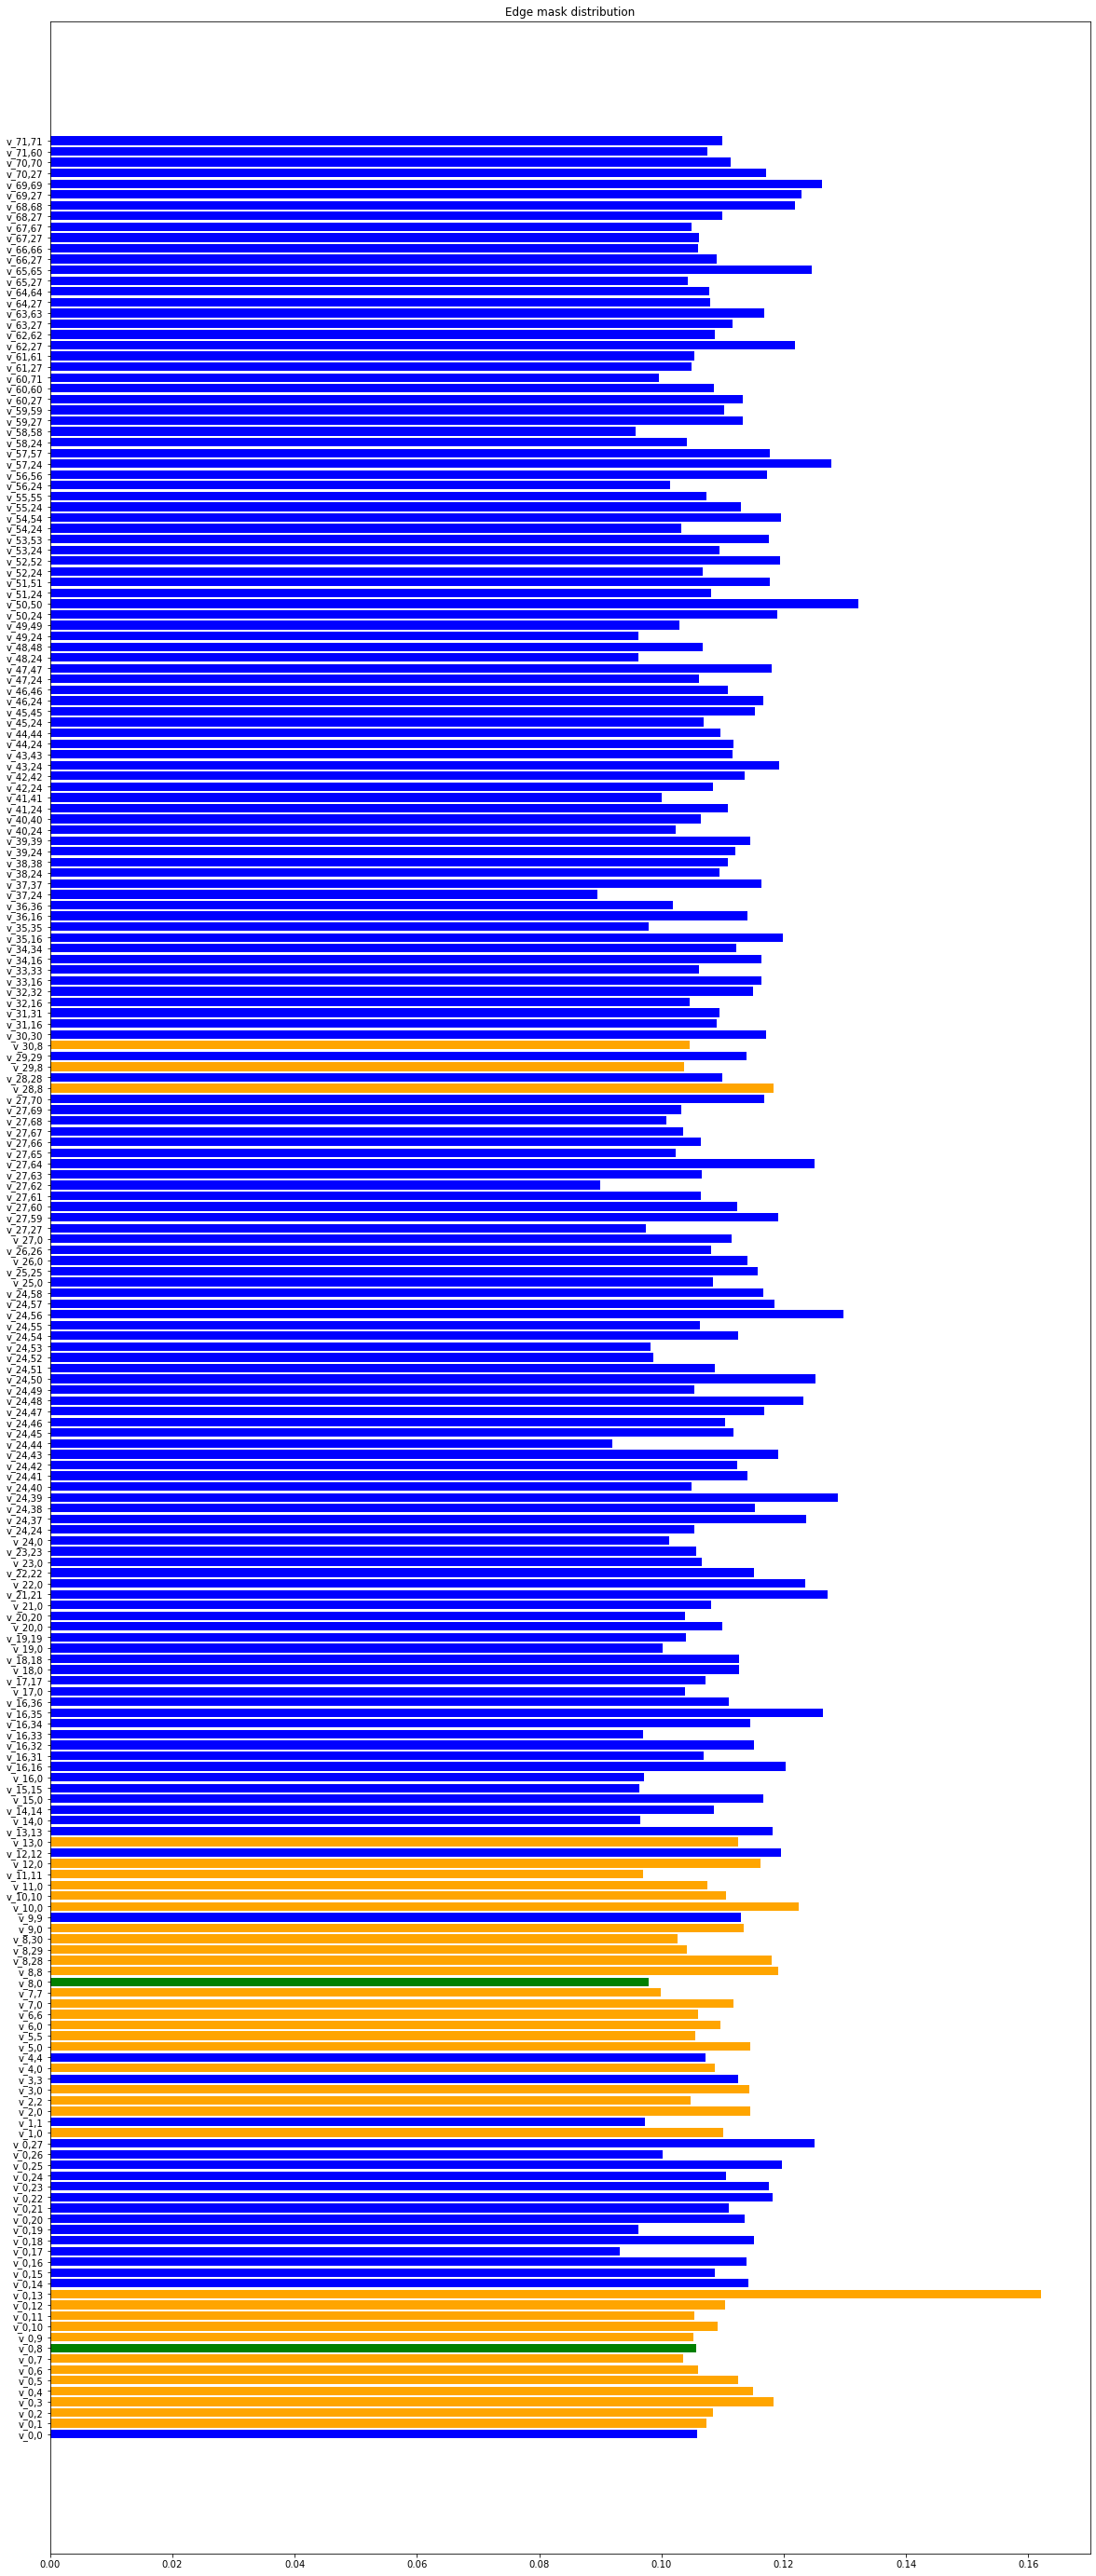

In [343]:
import numpy as np
edges_to_examine = np.array([[0, 8], [8, 0], [0, 16], [16, 0], [0, 24], [24, 0], [0, 27], [27, 0]])
explainer_echo_chamber.visualize_edge_mask_dist(highlight_edges=edges_to_examine, save_fig='EchoChamber1EdgeMaskDistribution')

In [262]:
# look at node 8, 16, 24, 27
edges_to_examine = np.array([[0, 8], [8, 0], [0, 16], [16, 0], [0, 24], [24, 0], [0, 27], [27, 0]])
edge_indexes = {}
for index, edge in enumerate(explainer_echo_chamber.sample_data.edge_index.T):
    e = edge.cpu().numpy()
    if e in edges_to_examine:
        edge_indexes[f'edge_{edge[0]}_{edge[1]}'] = explainer_echo_chamber.edge_mask[index]

In [263]:
edge_mask_values_dict = {}
for edge in edges_to_examine:
    edge_mask_values_dict[f'edge_{edge[0]}_{edge[1]}'] = edge_indexes[f'edge_{edge[0]}_{edge[1]}']


In [264]:
edge_mask_values_dict

{'edge_0_8': tensor(0.1056, device='cuda:0'),
 'edge_8_0': tensor(0.0978, device='cuda:0'),
 'edge_0_16': tensor(0.1139, device='cuda:0'),
 'edge_16_0': tensor(0.0971, device='cuda:0'),
 'edge_0_24': tensor(0.1105, device='cuda:0'),
 'edge_24_0': tensor(0.1013, device='cuda:0'),
 'edge_0_27': tensor(0.1251, device='cuda:0'),
 'edge_27_0': tensor(0.1115, device='cuda:0')}

In [265]:
edge_mask = explainer_echo_chamber.edge_mask
edge_mask_arg_sorted = edge_mask.argsort(descending=True)
edge_mask_arg_sorted

tensor([ 13, 170, 104,  87, 183,  78,  67, 209,  98, 118,  27, 201,  85,  79,
         96, 208,  49, 207, 194,  62, 139,  25, 178,  54, 174, 155, 113,  43,
         91, 169, 105, 125,   3,  22,  56,  44, 164, 184, 172,  23, 176, 182,
        130, 210, 197,  95, 124, 106,  59, 161, 135, 144, 137,  53, 108,  86,
        160,  64,  18,  80, 134,   4,  30,  36,  66, 148,  32,  14,  89, 109,
        141,  16, 128,  20, 154,  47, 189, 187,  48, 179,  71,  72, 102,  33,
         55,   5,  90, 114, 138, 147,  93, 157,  40, 196, 156, 111, 211,  68,
         21, 146, 151, 162,  50,  24,  12,  94, 188,  28,  75, 206, 213, 126,
        158,  38, 132, 145, 175,  10, 131, 202, 195,  34,  15,  99, 190,  58,
          2, 153, 107, 110,  77, 171, 198, 199, 212,  51,   1, 180,  70,  35,
        159,  63, 173, 166,  81, 117, 115, 150, 120, 103, 204, 163, 136,  39,
        203,   6,   0,  82,   8,  37, 193,  11,  97,  84,   9,  88, 205, 192,
         31, 133, 129, 200, 185,  45,  74,  69,  76, 127, 121,  

In [266]:
explainer_echo_chamber.sample_data.edge_index[:, 13]

tensor([ 0, 13], device='cuda:0')

In [267]:
explainer_echo_chamber.sample_data.edge_index[:, 89]

tensor([24, 41], device='cuda:0')

In [268]:
explainer_echo_chamber.sample_data.edge_index[:, 158]

tensor([44, 44], device='cuda:0')

In [269]:
explainer_echo_chamber.sample_data.edge_index[:, 157]

tensor([44, 24], device='cuda:0')

In [270]:
explainer_echo_chamber.sample_data.edge_index[:, 116]


tensor([27, 62], device='cuda:0')

In [271]:
explainer_echo_chamber.sample_data.edge_index[:, [173,  11,  22,  33, 187]]

tensor([[52,  0,  0,  3, 59],
        [24, 11, 22,  3, 27]], device='cuda:0')

In [272]:
model.m_predict(echo_chamber1)

Predicted the correct label. : Actual is tensor([0], device='cuda:0') and predicted tensor([0], device='cuda:0') with probability 0.9912202954292297


(tensor([0], device='cuda:0'), array([0.9912203 , 0.00877973], dtype=float32))

In [273]:
from util import build_input_from_subgraph, remove_news_content_from_sample, remove_historical_information
echo_chamber1_sg = build_input_from_subgraph(explainer_echo_chamber.subgraph, echo_chamber1)
model.m_predict(echo_chamber1_sg)

Predicted the correct label. : Actual is tensor([0], device='cuda:0') and predicted tensor([0], device='cuda:0') with probability 0.9914683103561401


(tensor([0], device='cuda:0'), array([0.9914683 , 0.00853174], dtype=float32))

In [344]:
echo_chamber1.num_nodes

72

In [276]:
echo_chamber1_news_removed = remove_news_content_from_sample(echo_chamber1)
model.m_predict(echo_chamber1_news_removed)

Predicted the correct label. : Actual is tensor([0], device='cuda:0') and predicted tensor([0], device='cuda:0') with probability 0.8328478336334229


(tensor([0], device='cuda:0'), array([0.83284783, 0.16715223], dtype=float32))

In [279]:
echo_chamber1_sg_news_removed = remove_news_content_from_sample(echo_chamber1_sg)
model.m_predict(echo_chamber1_sg_news_removed)

Predicted the correct label. : Actual is tensor([0], device='cuda:0') and predicted tensor([0], device='cuda:0') with probability 0.8018590807914734


(tensor([0], device='cuda:0'), array([0.8018591 , 0.19814089], dtype=float32))

In [284]:
echo_chamber1_historical_info_removed = remove_historical_information(echo_chamber1)
model.m_predict(echo_chamber1_historical_info_removed)

Predicted the correct label. : Actual is tensor([0], device='cuda:0') and predicted tensor([0], device='cuda:0') with probability 0.9812178611755371


(tensor([0], device='cuda:0'), array([0.98121786, 0.0187821 ], dtype=float32))

In [285]:
echo_chamber1.x

tensor([[ 0.4983,  0.1415,  0.3561,  ..., -0.4199,  0.2446,  1.0323],
        [-0.0111, -0.0716, -0.1016,  ...,  0.4221, -0.1941,  0.2685],
        [ 0.0332,  0.1159,  0.0657,  ...,  0.3730, -0.0025,  0.5887],
        ...,
        [ 0.0062,  0.0708,  0.0217,  ...,  0.3643, -0.0376,  0.5008],
        [ 0.0360,  0.0502,  0.0446,  ...,  0.4044, -0.0616,  0.4972],
        [ 0.0360,  0.0502,  0.0446,  ...,  0.4044, -0.0616,  0.4972]],
       device='cuda:0')

In [286]:
echo_chamber1_sg_historical_info_removed = remove_historical_information(echo_chamber1_sg)
echo_chamber1_sg_historical_info_removed.x

tensor([[ 0.4983,  0.1415,  0.3561,  ..., -0.4199,  0.2446,  1.0323],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0')

In [289]:
model.m_predict(echo_chamber1_sg_historical_info_removed)

Predicted the correct label. : Actual is tensor([0], device='cuda:0') and predicted tensor([0], device='cuda:0') with probability 0.980972409248352


(tensor([0], device='cuda:0'), array([0.9809724 , 0.01902764], dtype=float32))

In [287]:
echo_chamber1_node_info_removed = remove_news_content_from_sample(echo_chamber1_historical_info_removed)
model.m_predict(echo_chamber1_node_info_removed)

Predicted the correct label. : Actual is tensor([0], device='cuda:0') and predicted tensor([0], device='cuda:0') with probability 0.4940769672393799


(tensor([0], device='cuda:0'), array([0.49407697, 0.50592303], dtype=float32))

In [288]:
echo_chamber1_sg_node_info_removed = remove_news_content_from_sample(echo_chamber1_sg_historical_info_removed)
model.m_predict(echo_chamber1_sg_node_info_removed)

Predicted the correct label. : Actual is tensor([0], device='cuda:0') and predicted tensor([0], device='cuda:0') with probability 0.4940769672393799


(tensor([0], device='cuda:0'), array([0.49407697, 0.50592303], dtype=float32))

In [17]:
# sample_data_real = dataset_manager.get_random_train_samples(label=1, device=model.m_args.device)[0]
sample_data_real_loader = dataset_manager.loader(torch.utils.data.Subset(dataset_manager.train_loader.dataset.dataset, [249]), batch_size=dataset_manager.batch_size)
for d in sample_data_real_loader:
    sample_data_real = d.to(model.m_args.device)

In [18]:
model.m_predict(sample_data_real)

Predicted the correct label. : Actual is 1 and predicted 1 with probability 0.9956812858581543


(tensor([1], device='cuda:0'), array([0.00431867, 0.9956813 ], dtype=float32))

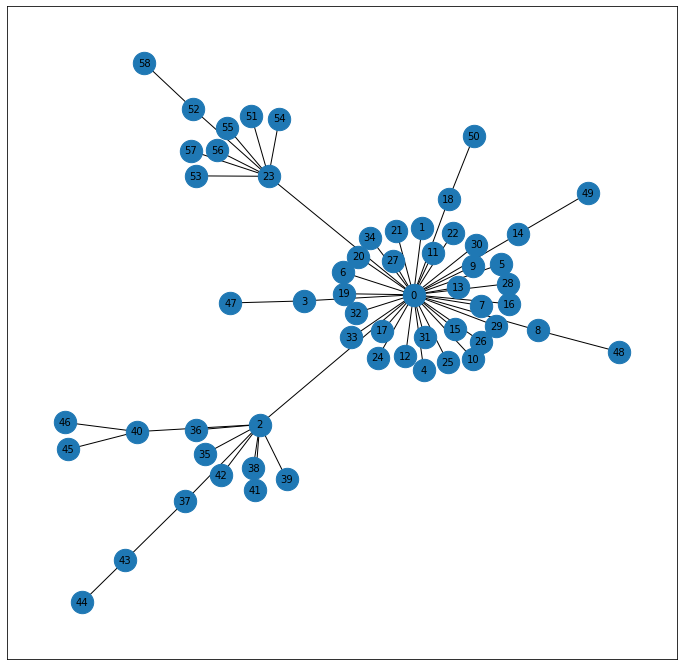

In [19]:
visualize_sample(sample_data_real, save_fig='POL_RealNewsExample1')

In [20]:
sample_data_real.num_nodes

59

In [21]:
real_sample_explainer = GNNModelExplainer(model, sample_data_real)

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 424.56it/s]


tensor([1])
y: Real
Using the threshold method: mean
Removing edges with score less than 0.104891836643219 with min torch.return_types.min(
values=tensor(0.0829),
indices=tensor(102)) and max torch.return_types.max(
values=tensor(0.1227),
indices=tensor(113))
 ############ Graph before dropping edges according to the edge mask ############


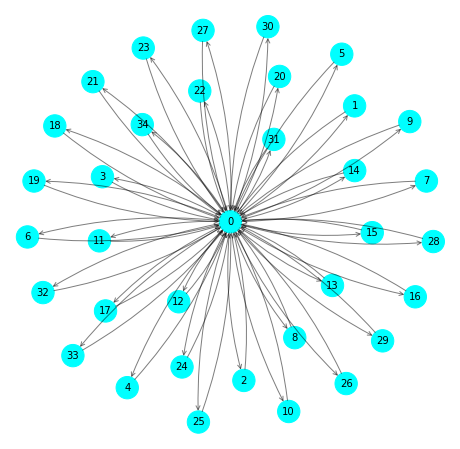

#################################################################################
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#################################################################################
 ############ Graph after dropping edges according to the edge mask ############
Dropping 86 edges out of 175
50
Number of nodes before dropping unimportant edges: 35


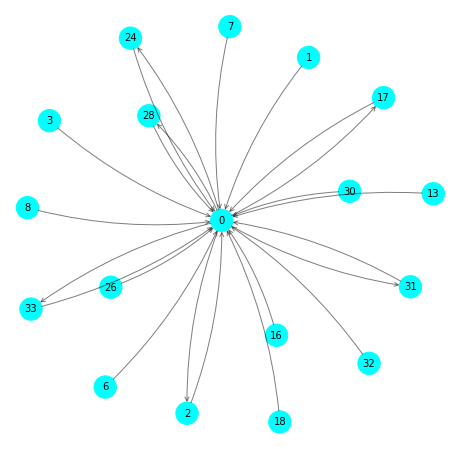

In [23]:
real_sample_explainer.visualize_explaining_graph(save_as='POL_RealNewsExample1Explanation', threshold_method='mean')

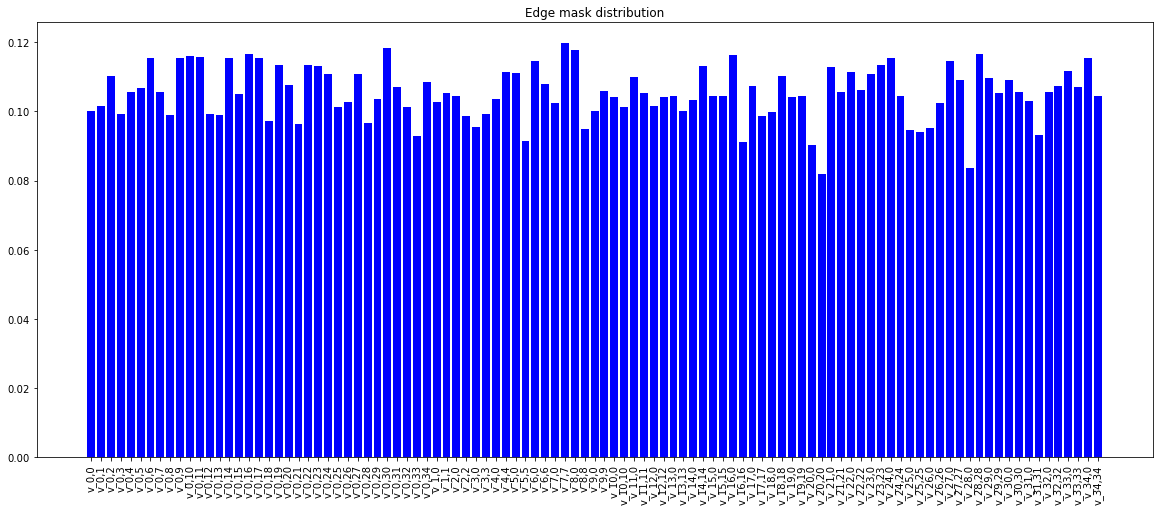

In [359]:
real_sample_explainer.visualize_edge_mask_for_subgraph()

In [45]:
real_news_example2 = dataset_manager.get_random_val_samples(device=model.m_args.device, label=1)

Choosing indexes in dataset: [255]
Choosing indexes in train: [19]


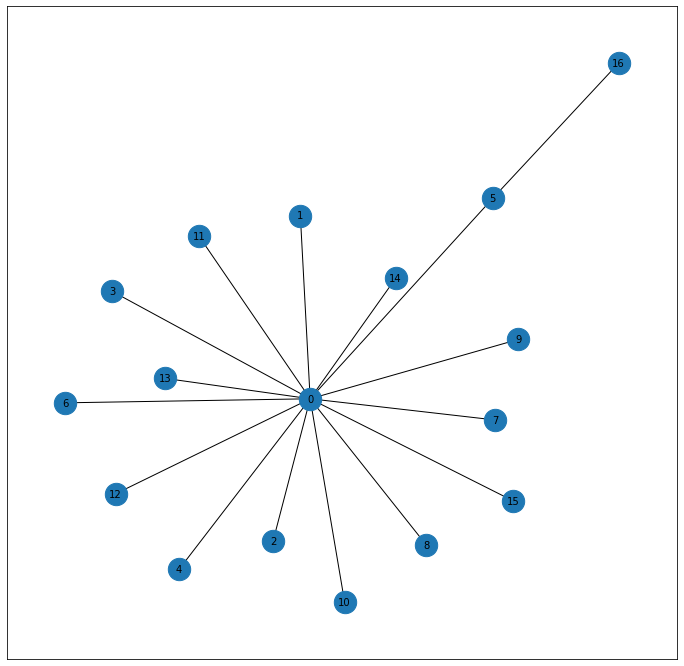

In [55]:
visualize_sample(real_news_example2[0], save_fig='POL_RealNewsExample2')

In [52]:
real_news_example2_explainer = GNNModelExplainer(model, real_news_example2[0])

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 360.26it/s]


tensor([1])
y: Real
Using the threshold method: mean
Removing edges with score less than 0.2525138854980469 with min torch.return_types.min(
values=tensor(0.0618),
indices=tensor(9)) and max torch.return_types.max(
values=tensor(0.9500),
indices=tensor(19))
 ############ Graph before dropping edges according to the edge mask ############


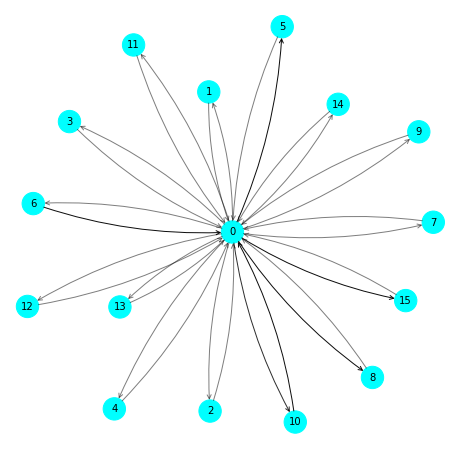

#################################################################################
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#################################################################################
 ############ Graph after dropping edges according to the edge mask ############
Dropping 39 edges out of 49
9
Number of nodes before dropping unimportant edges: 16


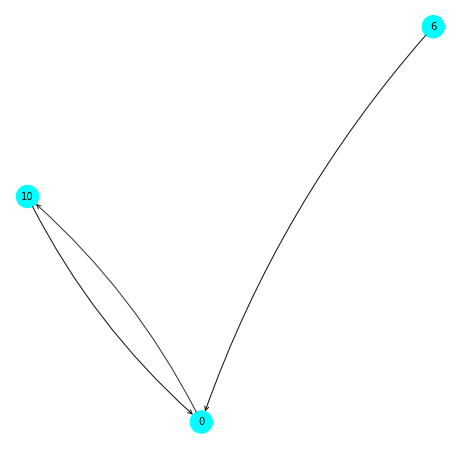

In [57]:
real_news_example2_explainer.visualize_explaining_graph(threshold_method='mean', save_as='POL_RealNewsExample2Explanation')

In [24]:
from GNNFakeNews.utils.helpers.gnn_dataset_manager import GNNDatasetManager
from GNNFakeNews.utils.helpers.hyperparameter_factory import HparamFactory
from GNNFakeNews.utils.enums import GNNDatasetTypeEnum
hparams = HparamFactory(model_type=model.m_hparams.model_type, dataset=GNNDatasetTypeEnum.GOSSIPCOP)
gossipcop_dataset_manager = GNNDatasetManager(hparam_manager=hparams)
    #dataset_manager.get_test_samples(device=model.m_args.device, label=0, return_indexes=True)

#################################
-----> The hyperparameters are set!
model_type = GNNModelTypeEnum.SAGE_GNN
dataset = GNNDatasetTypeEnum.GOSSIPCOP
batch_size = 128
lr = 0.01
weight_decay = 0.01
n_hidden = 128
epochs = 35
feature = GNNFeatureTypeEnum.BERT
concat = True
transform = <GNNFakeNews.utils.data_loader.ToUndirected object at 0x7f770e05a650>
#################################
Loading dataset 'gossipcop' from directory: /home/sersery/Desktop/TUM Informatik/SS22/Thesis/Code/Explainability_of_FND_Models/GNNFakeNews/data/local


In [26]:
# gos_fake_news, gos_fake_news_idx = gossipcop_dataset_manager.get_test_samples(label=0, device=model.m_args.device, return_indexes=True)
gos_fake_news_loader = dataset_manager.loader(torch.utils.data.Subset(gossipcop_dataset_manager.train_loader.dataset.dataset, [2522]), batch_size=gossipcop_dataset_manager.batch_size)
for d in gos_fake_news_loader:
    gos_fake_news = d.to(model.m_args.device)
# gos_fake_news_idx

In [27]:
model.m_predict(gos_fake_news)

Predicted the wrong label: Actual is 0 and predicted 1 with probability 0.0015679843490943313


(tensor([0], device='cuda:0'), array([0.00156798, 0.998432  ], dtype=float32))

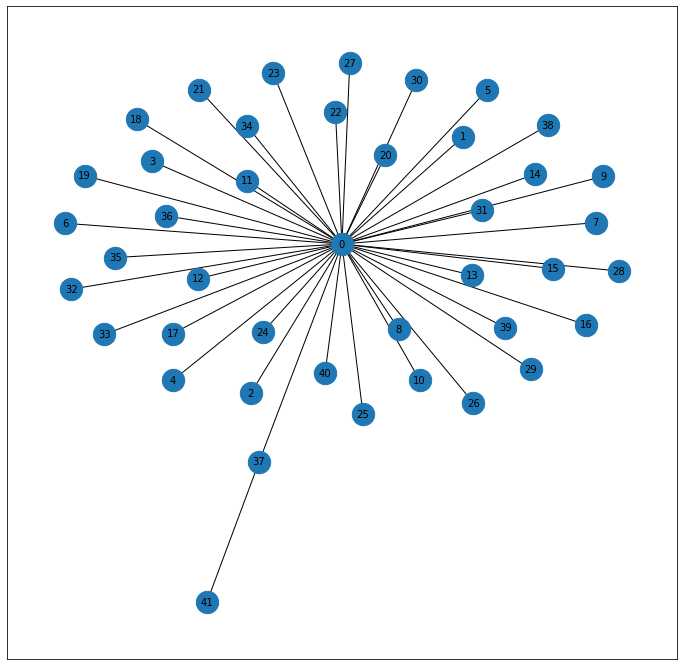

In [28]:
visualize_sample(gos_fake_news, save_fig='GOS_FakeNewsExample1')

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 460.57it/s]


tensor([0])
y: Fake
Using the threshold method: median
Removing edges with score less than 0.09729840606451035 with min torch.return_types.min(
values=tensor(0.0732),
indices=tensor(117)) and max torch.return_types.max(
values=tensor(0.1082),
indices=tensor(121))
 ############ Graph before dropping edges according to the edge mask ############


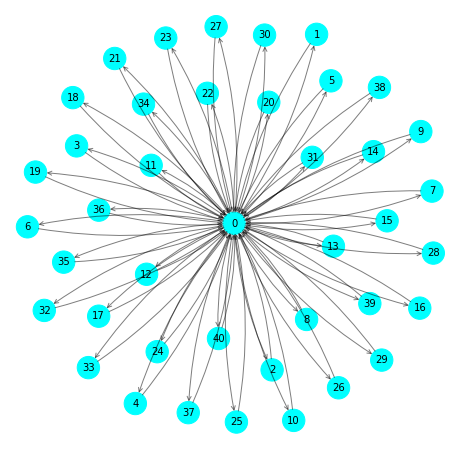

#################################################################################
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#################################################################################
 ############ Graph after dropping edges according to the edge mask ############
Dropping 62 edges out of 124
36
Number of nodes before dropping unimportant edges: 41


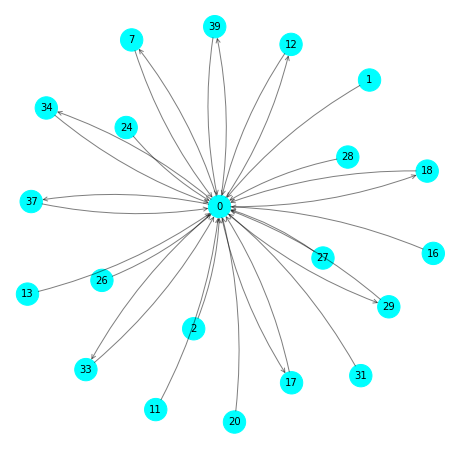

In [29]:
gos_fake_news_explainer = GNNModelExplainer(model, gos_fake_news[0])
gos_fake_news_explainer.visualize_explaining_graph()

In [33]:
toy_fake_news = gos_fake_news.clone()

In [34]:
# create 20 nodes with no information
new_node_count = 20
toy_nodes_idx = torch.randint(low=0, high=toy_fake_news.x.size(0)-1, size=(20,))

In [35]:
toy_nodes_idx

tensor([35,  7, 34, 20,  4, 15, 25, 38, 25, 36, 14,  6, 38, 36, 19,  9,  0, 40,
        10, 13])

In [36]:
gos_toy2 = gossipcop_dataset_manager.get_test_samples(device=model.m_args.device, label=0)[0]

Choosing indexes in dataset: [1433]
Choosing indexes in train: [3368]


In [37]:
toy_nodes = gos_toy2.x[toy_nodes_idx, :]

In [38]:
# add the nodes to the existing node set
toy_nodes = torch.cat([toy_fake_news.x, toy_nodes])
toy_nodes

tensor([[-0.0407, -0.2084, -0.0770,  ...,  0.2549, -0.0573,  0.1351],
        [ 0.1415, -0.0493, -0.1443,  ...,  0.4186, -0.0096,  0.2688],
        [ 0.0191,  0.0422,  0.0626,  ...,  0.4245,  0.0325,  0.5577],
        ...,
        [-0.1163, -0.0564, -0.0213,  ...,  0.4714, -0.0645,  0.2463],
        [-0.0596, -0.0593,  0.0150,  ...,  0.5427, -0.0948,  0.2118],
        [-0.0334,  0.0329,  0.0226,  ...,  0.4835, -0.0475,  0.4390]],
       device='cuda:0')

In [39]:
toy_edge_indexes = []
nodes_to_populate = [37, 39]
last_node_idx = toy_fake_news.num_nodes - 1
new_idx = last_node_idx + 1
for i in range(new_node_count):
    # add self loop
    toy_edge_indexes.append([new_idx, new_idx])
    # add the edges to a fixed source node
    toy_edge_indexes.append([new_idx, nodes_to_populate[int(i/10)]])
    toy_edge_indexes.append([nodes_to_populate[int(i/10)], new_idx])
    new_idx += 1
toy_edge_indexes

[[42, 42],
 [42, 37],
 [37, 42],
 [43, 43],
 [43, 37],
 [37, 43],
 [44, 44],
 [44, 37],
 [37, 44],
 [45, 45],
 [45, 37],
 [37, 45],
 [46, 46],
 [46, 37],
 [37, 46],
 [47, 47],
 [47, 37],
 [37, 47],
 [48, 48],
 [48, 37],
 [37, 48],
 [49, 49],
 [49, 37],
 [37, 49],
 [50, 50],
 [50, 37],
 [37, 50],
 [51, 51],
 [51, 37],
 [37, 51],
 [52, 52],
 [52, 39],
 [39, 52],
 [53, 53],
 [53, 39],
 [39, 53],
 [54, 54],
 [54, 39],
 [39, 54],
 [55, 55],
 [55, 39],
 [39, 55],
 [56, 56],
 [56, 39],
 [39, 56],
 [57, 57],
 [57, 39],
 [39, 57],
 [58, 58],
 [58, 39],
 [39, 58],
 [59, 59],
 [59, 39],
 [39, 59],
 [60, 60],
 [60, 39],
 [39, 60],
 [61, 61],
 [61, 39],
 [39, 61]]

In [40]:
toy_edge_idxs_tensor = torch.LongTensor(toy_edge_indexes).to(model.m_args.device)

In [41]:
toy_edge_indexes = torch.cat([toy_fake_news.edge_index.T, toy_edge_idxs_tensor]).T

In [42]:
from torch_geometric.data import Data
toy_batch = torch.zeros_like(toy_nodes[:, 0], dtype=torch.long)
toy_data = Data(x=toy_nodes, edge_index=toy_edge_indexes, batch=toy_batch, y=toy_fake_news.y)

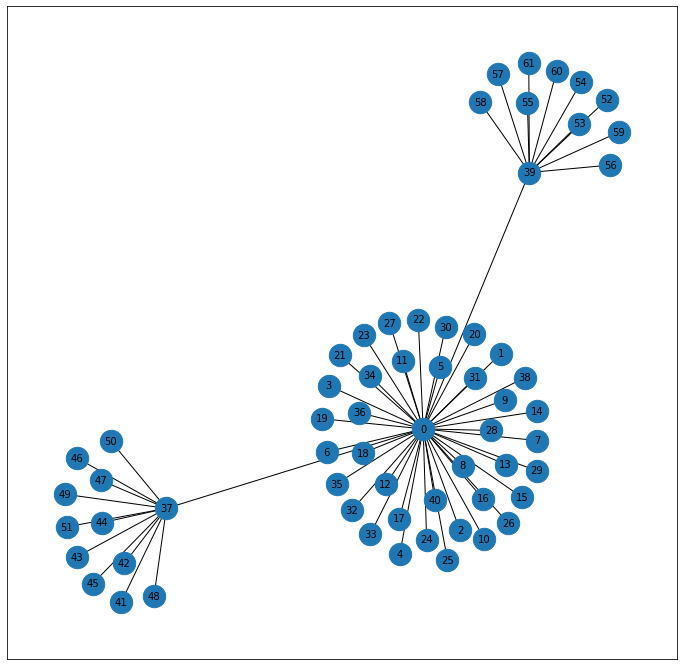

In [44]:
visualize_sample(toy_data, save_fig='GOS_FakeNewsExample1Perturbed')

In [521]:
model.m_predict(toy_data)

Predicted the wrong label: Actual is 0 and predicted 1 with probability 0.001567985164001584


(tensor([0], device='cuda:0'), array([0.00156799, 0.998432  ], dtype=float32))

In [426]:
toy_edge_indexes = []

for edge in toy_fake_news.edge_index.T:
    e = edge.cpu().numpy()
    if edge[0] in nodes_to_populate:


[0 0]
[0 1]
[0 2]
[0 3]
[0 4]
[0 5]
[0 6]
[0 7]
[0 8]
[0 9]
[ 0 10]
[ 0 11]
[ 0 12]
[ 0 13]
[ 0 14]
[ 0 15]
[ 0 16]
[ 0 17]
[ 0 18]
[ 0 19]
[ 0 20]
[ 0 21]
[ 0 22]
[ 0 23]
[ 0 24]
[ 0 25]
[ 0 26]
[ 0 27]
[ 0 28]
[ 0 29]
[ 0 30]
[ 0 31]
[ 0 32]
[ 0 33]
[ 0 34]
[ 0 35]
[ 0 36]
[ 0 37]
[ 0 38]
[ 0 39]
[ 0 40]
[1 0]
[1 1]
[2 0]
[2 2]
[3 0]
[3 3]
[4 0]
[4 4]
[5 0]
[5 5]
[6 0]
[6 6]
[7 0]
[7 7]
[8 0]
[8 8]
[9 0]
[9 9]
[10  0]
[10 10]
[11  0]
[11 11]
[12  0]
[12 12]
[13  0]
[13 13]
[14  0]
[14 14]
[15  0]
[15 15]
[16  0]
[16 16]
[17  0]
[17 17]
[18  0]
[18 18]
[19  0]
[19 19]
[20  0]
[20 20]
[21  0]
[21 21]
[22  0]
[22 22]
[23  0]
[23 23]
[24  0]
[24 24]
[25  0]
[25 25]
[26  0]
[26 26]
[27  0]
[27 27]
[28  0]
[28 28]
[29  0]
[29 29]
[30  0]
[30 30]
[31  0]
[31 31]
[32  0]
[32 32]
[33  0]
[33 33]
[34  0]
[34 34]
[35  0]
[35 35]
[36  0]
[36 36]
[37  0]
[37 37]
[37 41]
[38  0]
[38 38]
[39  0]
[39 39]
[40  0]
[40 40]
[41 37]
[41 41]


tensor([0])
y: Fake
Using the threshold method: mean
Removing edges with score less than 0.09833643585443497 with min torch.return_types.min(
values=tensor(0.0857),
indices=tensor(62)) and max torch.return_types.max(
values=tensor(0.1086),
indices=tensor(23))
 ############ Graph before dropping edges according to the edge mask ############


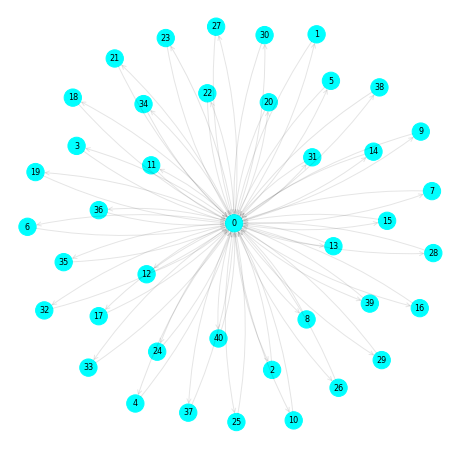

#################################################################################
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#################################################################################
 ############ Graph after dropping edges according to the edge mask ############
Dropping 54 edges out of 124
37
Number of nodes before dropping unimportant edges: 41


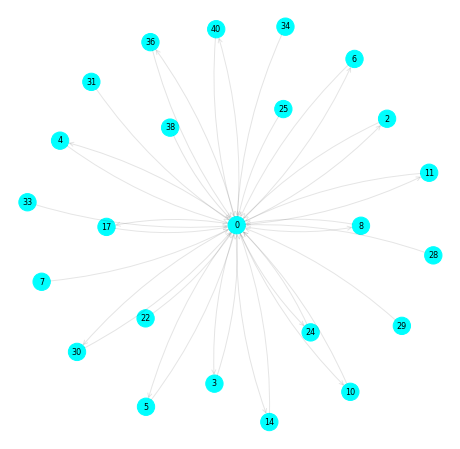

In [415]:
gos_fake_news_explainer.visualize_explaining_graph(threshold_method='mean')


In [418]:
gos_real_news_instance = gossipcop_dataset_manager.get_test_samples(device=model.m_args.device, label=1)

Choosing indexes in dataset: [3633]
Choosing indexes in train: [2778]


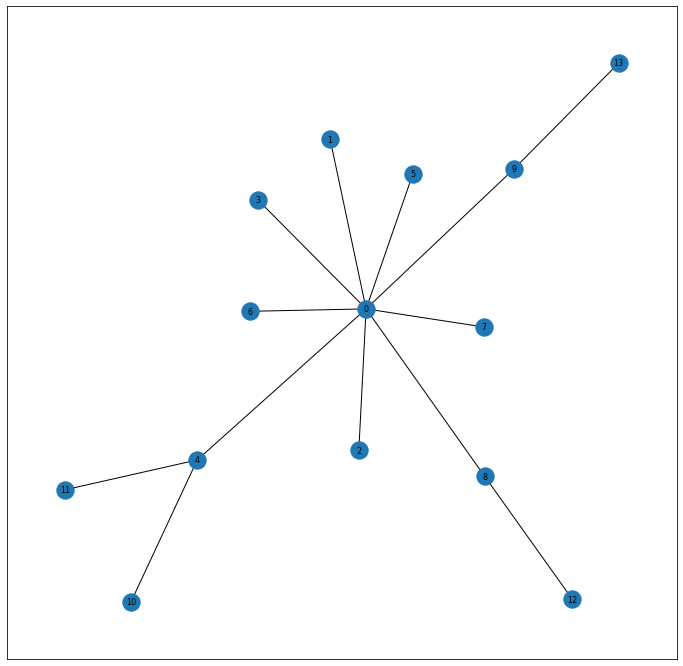

In [419]:
visualize_sample(gos_real_news_instance[0])

In [421]:
model.m_predict(gos_real_news_instance[0])

Predicted the correct label. : Actual is 1 and predicted 1 with probability 0.9900287985801697


(tensor([1], device='cuda:0'), array([0.00997121, 0.9900288 ], dtype=float32))

In [ ]:
gos_real_news_explainer = GNNModelExplainer()

In [371]:
# sample_data_list = dataset_manager.get_random_train_samples(device=model.m_args.device, label=0, len_samples=20)
# explainers = []
# user_ids = []
# for sample in sample_data_list:
#     e = GNNModelExplainer(model, sample)
#     e.visualize_explaining_graph()
#     user_ids.append(e.get_node_ids_of_explaining_subgraph())
#     explainers.append(e)

In [372]:
# import numpy as np
# arr = user_ids[0]
# for i in range(1, len(user_ids)):
#     arr = np.intersect1d(arr, user_ids[i])
# print(arr)

# Visualize dataset distribution

In [5]:
from util import collect_labels
train_labels = collect_labels(dataset_manager.train_set)
val_labels = collect_labels(dataset_manager.val_set)
test_labels = collect_labels(dataset_manager.test_set)

len fake news 36
len real news 26
len fake news 13
len real news 18
len fake news 108
len real news 113
Total len: 314


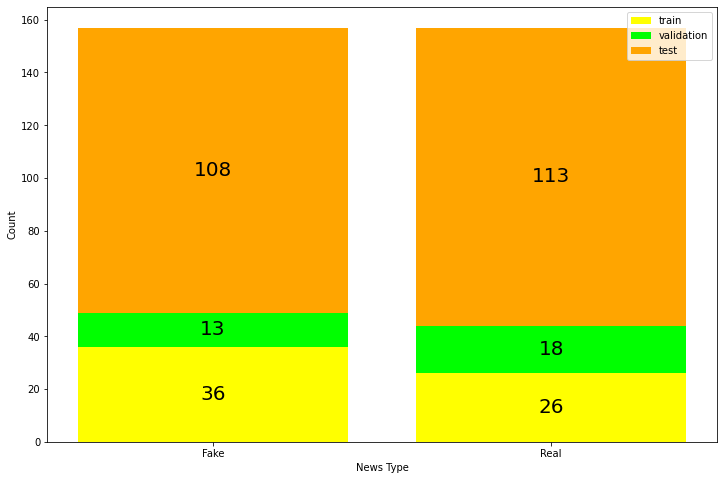

In [8]:
from util import plot_dataset_label_distribution_by_split

plot_dataset_label_distribution_by_split(train_labels, val_labels, test_labels, save_fig='POL_DatasetDistrByLabelAndSplit')